## Tensorflow for machine learnign 
* Reading tfrecords for analysis / model training

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
import glob
%matplotlib inline

In [4]:
file_list = tf.train.match_filenames_once('./output/tf_write_test/*.tfrecords')

In [5]:
# sess = tf.Session()
# sess.run(tf.initialize_all_variables())
# sess.run(file_list)

In [6]:
filename_queue = tf.train.string_input_producer(
    tf.train.match_filenames_once("./output/testing-images/*.tfrecords"))

In [7]:
reader = tf.TFRecordReader()
_, serialized = reader.read(filename_queue)

In [8]:
features = tf.parse_single_example(
    serialized,
    features={
        'label':tf.FixedLenFeature([], tf.string),
        'image':tf.FixedLenFeature([], tf.string)
    })

In [9]:
image = tf.reshape(tf.decode_raw(features['image'], tf.uint8), [250,151,1])
label = tf.cast(features['label'], tf.string)

In [102]:
min_after_dequeue = 10
batch_size = 7
capacity = min_after_dequeue + 3 * batch_size + 10

image_batch, label_batch = tf.train.shuffle_batch(
    [image, label], batch_size=batch_size, capacity=capacity, min_after_dequeue=min_after_dequeue)

In [ ]:
tf.train.shuffle_batch

In [ ]:
float_image_batch = tf.image.convert_image_dtype(image_batch, tf.float32)

In [51]:
imgs = []
with tf.Session() as sess:
    
    sess.run(tf.initialize_all_variables())
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

#     for i in range(1000):
#         imgs.append(sess.run([image]))

    imgs.append(sess.run([image_batch]))

    coord.request_stop()
    coord.join(threads)

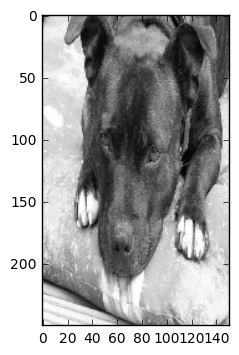

In [52]:
# if using image batch
# the first dimension of tensor is equivalent to batch size that is specified in the tf.train.shuffle.batch
plt.imshow(imgs[0][0][0,:,:,:].reshape(250,151), cmap='gray')

In [54]:
# if going one by one to get the values
plt.imshow(imgs[0][0].reshape(250,151,1), cmap='gray')

ValueError: total size of new array must be unchanged

In [108]:
del imgs

### reading images outside of with
prefered way

In [107]:
imgs = []
labs = []
sess = tf.Session()
    
sess.run(tf.initialize_all_variables())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord, sess=sess)

img_, lab_ = sess.run([image_batch, label_batch])
print lab_

coord.request_stop()
coord.join(threads)

['n02112137-chow' 'n02112137-chow' 'n02112137-chow' 'n02112137-chow'
 'n02086910-papillon' 'n02086910-papillon' 'n02086910-papillon']
